In [1]:
print("Hello")

Hello


In [29]:
import os, shutil

#original_dataset_dir_cat = 'Data\Cat'

#original_dataset_dir_dog = 'Data\Dog'

def create_dir(original_dataset_dir_cat = str, original_dataset_dir_dog=str):
    """
    Desc:

    Input:

    Output:
    
    """
    
    
    base_dir = r'C:\Users\riandrea\Desktop\Github\SceneDetect\cats_and_dogs_small'
    train_dir = None
    test_dir = None
    validation_dir = None

    if os.path.exists(base_dir) == False:
        os.mkdir(base_dir)

        train_dir = os.path.join(base_dir, 'train')
        os.mkdir(train_dir)

        validation_dir = os.path.join(base_dir, 'validation')
        os.mkdir(validation_dir)

        test_dir = os.path.join(base_dir, 'test')
        os.mkdir(test_dir)

        test_cats_dir = os.path.join(test_dir, 'cats')
        os.mkdir(test_cats_dir)

        test_dogs_dir = os.path.join(test_dir, 'dogs')
        os.mkdir(test_dogs_dir)

        train_cats_dir = os.path.join(train_dir, 'cats')
        os.mkdir(train_cats_dir)

        train_dogs_dir = os.path.join(train_dir, 'dogs')
        os.mkdir(train_dogs_dir)

        validation_cats_dir = os.path.join(validation_dir, 'cats')
        os.mkdir(validation_cats_dir)

        validation_dogs_dir = os.path.join(validation_dir, 'dogs')
        os.mkdir(validation_dogs_dir)
        
        fnames = ['{}.jpg'.format(i) for i in range(1000)]
        for fname in fnames:
            src = os.path.join(original_dataset_dir_cat, fname)
            dst = os.path.join(train_cats_dir, fname)
            shutil.copyfile(src, dst)
        
        fnames = ['{}.jpg'.format(i) for i in range(1000, 1500)]
        for fname in fnames:
            src = os.path.join(original_dataset_dir_cat, fname)
            dst = os.path.join(validation_cats_dir, fname)
            shutil.copyfile(src, dst)
        
        fnames = ['{}.jpg'.format(i) for i in range(1500, 2000)]
        for fname in fnames:
            src = os.path.join(original_dataset_dir_cat, fname)
            dst = os.path.join(test_cats_dir, fname)
            shutil.copyfile(src, dst)
        
        fnames = ['{}.jpg'.format(i) for i in range(1000)]
        for fname in fnames:
            src = os.path.join(original_dataset_dir_dog, fname)
            dst = os.path.join(train_dogs_dir, fname)
            shutil.copyfile(src, dst)
        
        fnames = ['{}.jpg'.format(i) for i in range(1000, 1500)]
        for fname in fnames:
            src = os.path.join(original_dataset_dir_dog, fname)
            dst = os.path.join(validation_dogs_dir, fname)
            shutil.copyfile(src, dst)
        
        fnames = ['{}.jpg'.format(i) for i in range(1500, 2000)]
        for fname in fnames:
            src = os.path.join(original_dataset_dir_dog, fname)
            dst = os.path.join(test_dogs_dir, fname)
            shutil.copyfile(src, dst)

        print("Succesfully created Dir")


    else:
        print('total test cat images:', 
            len(os.listdir(base_dir + "/test/cats/")))
        
        print('total test cat images:', 
            len(os.listdir(base_dir + "/test/dogs/")))
        
        print('total training cat images:', 
            len(os.listdir(base_dir + "/train/cats/")))
        
        print('total training cat images:', 
            len(os.listdir(base_dir + "/train/dogs/")))
        
        print('total validation cat images:', 
            len(os.listdir(base_dir + "/validation/cats/")))
        
        print('total validation cat images:', 
            len(os.listdir(base_dir + "/validation/dogs/")))
        
        train_dir = 'cats_and_dogs_small/train'
        test_dir = 'cats_and_dogs_small/test'
        validation_dir = 'cats_and_dogs_small/validation'
    
    return train_dir, test_dir, validation_dir

train_dir, test_dir, validation_dir = create_dir(original_dataset_dir_cat='Data\Cat', original_dataset_dir_dog='Data\Dog')

print(train_dir, test_dir, validation_dir)


total test cat images: 500
total test cat images: 500
total training cat images: 999
total training cat images: 1000
total validation cat images: 500
total validation cat images: 500
cats_and_dogs_small/train cats_and_dogs_small/test cats_and_dogs_small/validation


In [30]:
from keras import layers, models, optimizers

def model_Conv():
    model = models.Sequential()
    model.add(layers.Conv2D(32,(3,3), 
                            activation='relu',
                            input_shape=(150,150,3)))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Conv2D(64,(3,3), activation='relu'))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Conv2D(128,(3,3), activation='relu'))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Conv2D(128,(3,3), activation='relu'))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))


    model.compile(loss='binary_crossentropy',
                    optimizer=optimizers.RMSprop(learning_rate=1e-4),
                    metrics=['acc'])
    #print(model.summary())

    return model

model = model_Conv()

c:\Users\riandrea\Desktop\Github\SceneDetect\project\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
from tensorflow import keras
from keras._tf_keras.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150), 
                                                    batch_size=20,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
            validation_dir, 
            target_size=(150, 150),
            batch_size=20,
            class_mode='binary')

def desc_data():
    for data_batch, labels_patch in train_generator:
        print('data batch shape:', data_batch.shape)
        print('label batch shape:', labels_patch.shape)
        break
    return data_batch, labels_patch

data_batch, labels_patch = desc_data()  

print('Returned data batch shape:', data_batch.shape)
print('Returned label batch shape:', labels_patch.shape)


Found 1999 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
data batch shape: (20, 150, 150, 3)
label batch shape: (20,)
Returned data batch shape: (20, 150, 150, 3)
Returned label batch shape: (20,)


In [40]:
callbacks = [
 keras.callbacks.ModelCheckpoint(
 filepath="convnet_from_scratch.keras",
 save_best_only=True,
 monitor="val_loss")
]

history = model.fit(
 train_generator,
 epochs=30,
 validation_data=validation_generator,
 callbacks=callbacks)

model.save('cats_and_dogs_small_1.h5')

Epoch 1/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 14s 144ms/step - acc: 0.8443 - loss: 0.3302 - val_acc: 0.7050 - val_loss: 0.5752
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 188ms/step - acc: 0.8650 - loss: 0.3199 - val_acc: 0.7180 - val_loss: 0.5663
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 194ms/step - acc: 0.8898 - loss: 0.2839 - val_acc: 0.7300 - val_loss: 0.5815
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 193ms/step - acc: 0.8897 - loss: 0.2732 - val_acc: 0.7320 - val_loss: 0.5833
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 192ms/step - acc: 0.9128 - loss: 0.2338 - val_acc: 0.7290 - val_loss: 0.6487
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 192ms/step - acc: 0.9216 - loss: 0.2139 - val_acc: 0.7260 - val_loss: 0.6294
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 194ms/step - acc: 0.9172 - loss: 0.2057 - val_acc: 0.7330 - val_loss: 0.6504
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 193ms/step - acc: 0.9326 - loss: 0.1807 - val_acc: 0.7410 - val_loss: 0.6143
Epoch 9/30
100/100 ━━━━━━━━━━━━━

In [41]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

len(acc),len(val_acc),len(loss),len(val_loss)

(30, 30, 30, 30)

In [42]:
print(history.history.keys())  


dict_keys(['acc', 'loss', 'val_acc', 'val_loss'])


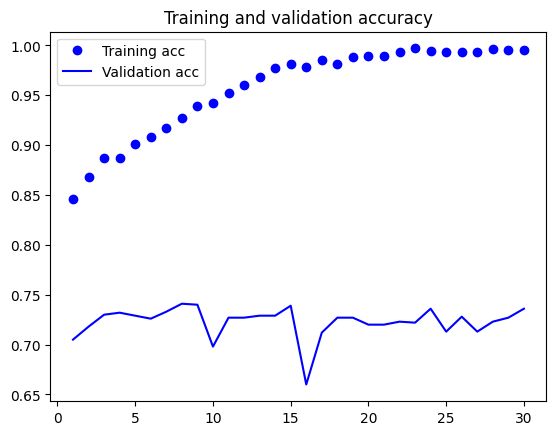

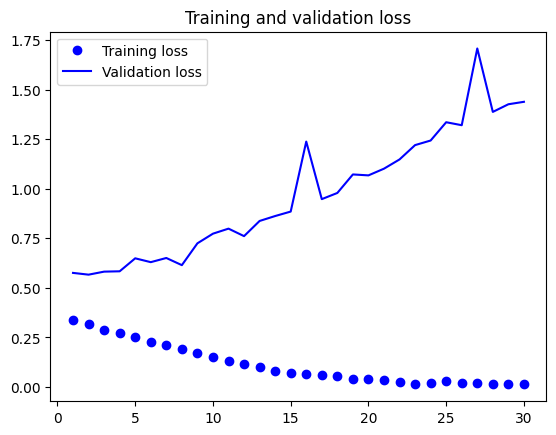

In [48]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [45]:
datagen = ImageDataGenerator(
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

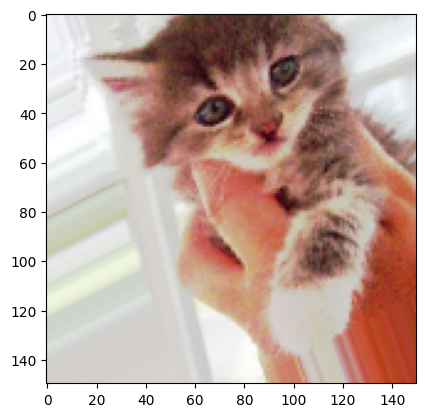

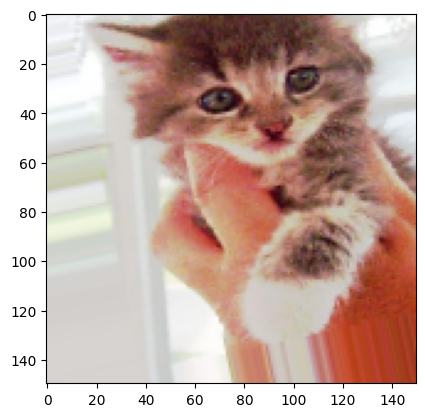

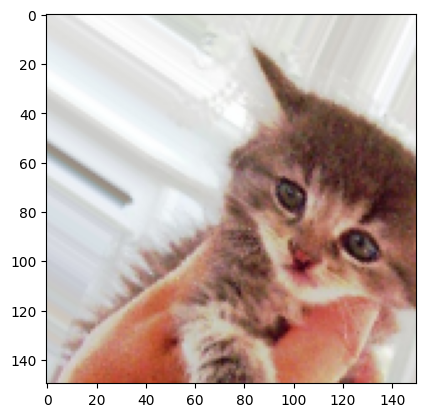

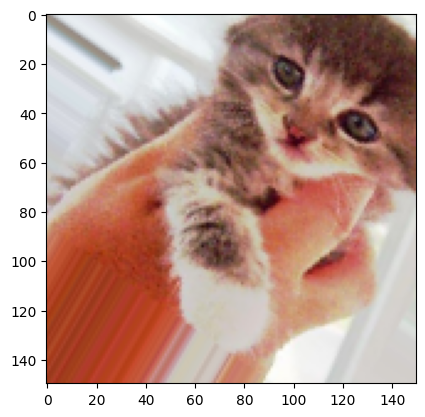

In [59]:
from keras.preprocessing import image
fnames = [os.path.join('cats_and_dogs_small/train/cats', fname) for fname in os.listdir('cats_and_dogs_small/train/cats')]
img_path = fnames[3]
img = image.load_img(img_path, target_size=(150, 150))

x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

In [61]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(learning_rate=1e-4),
metrics=['acc'])

c:\Users\riandrea\Desktop\Github\SceneDetect\project\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [63]:
train_datagen = ImageDataGenerator(
rescale=1./255,
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
train_dir,
target_size=(150, 150),
batch_size=32,
class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
validation_dir,
target_size=(150, 150),
batch_size=32,
class_mode='binary')
history = model.fit(
train_generator,
steps_per_epoch=100,
epochs=100,
validation_data=validation_generator,
validation_steps=50)

Found 1999 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


c:\Users\riandrea\Desktop\Github\SceneDetect\project\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
 63/100 ━━━━━━━━━━━━━━━━━━━━ 9s 255ms/step - acc: 0.5087 - loss: 0.6955

C:\Users\riandrea\AppData\Local\Programs\Python\Python311\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 191ms/step - acc: 0.5117 - loss: 0.6949 - val_acc: 0.5080 - val_loss: 0.6878
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 22s 223ms/step - acc: 0.5327 - loss: 0.6905 - val_acc: 0.5120 - val_loss: 0.6814
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 21s 211ms/step - acc: 0.5507 - loss: 0.6814 - val_acc: 0.5340 - val_loss: 0.6777
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 21s 213ms/step - acc: 0.5635 - loss: 0.6778 - val_acc: 0.5420 - val_loss: 0.6825
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 22s 215ms/step - acc: 0.5791 - loss: 0.6680 - val_acc: 0.5920 - val_loss: 0.6570
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 22s 215ms/step - acc: 0.5982 - loss: 0.6565 - val_acc: 0.6070 - val_loss: 0.6459
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 21s 212ms/step - acc: 0.6084 - loss: 0.6527 - val_acc: 0.6220 - val_loss: 0.6368
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 22s 214ms/step - acc: 0.6180 - loss: 0.6457 - val_acc: 0.6360 - val_loss: 0.6281
Epoch 9/100
100/100 ━━━━━━━━━━━━━━━━

In [65]:
model.save('cats_and_dogs_small_2.h5')

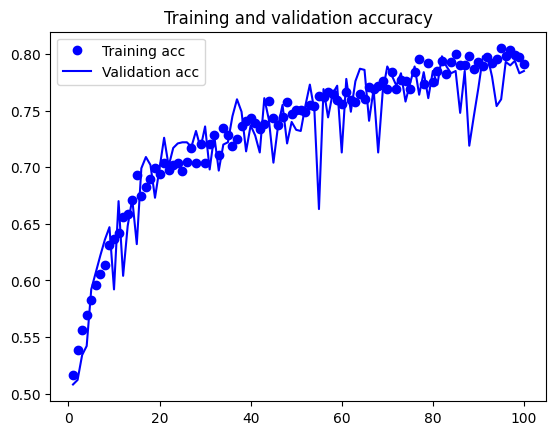

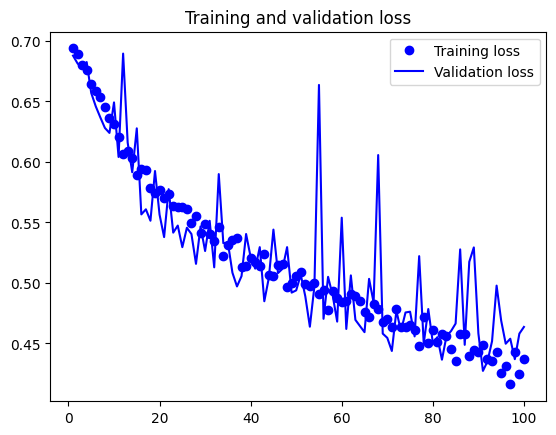

In [66]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()